 The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in 
Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.
It includes three iris species with 50 samples each as well as some properties about each flower.
One flower species is linearly separable from the other two, but the other two are not linearly separable
from each other.

The columns in this dataset are:

    Id
    SepalLengthCm
    SepalWidthCm
    PetalLengthCm
    PetalWidthCm
    Species

The Data set has been clustered using K-means.


|||-------------|||

Importing of All the needed libraries

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Importing data

In [3]:
data=pd.read_csv('Iris.csv')

In [4]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


removing empty rows and unwanted data

In [5]:
data.dropna()
data=data.drop(labels=['Id'],axis=1)

In [6]:
x=data.iloc[:,0:4]
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


filling missing values

In [7]:
from sklearn.impute import SimpleImputer 
impute=SimpleImputer(missing_values=np.nan,strategy='mean')
impute=impute.fit(x)
x=impute.transform(x)

optimizing model using k-means++ and Elbow method

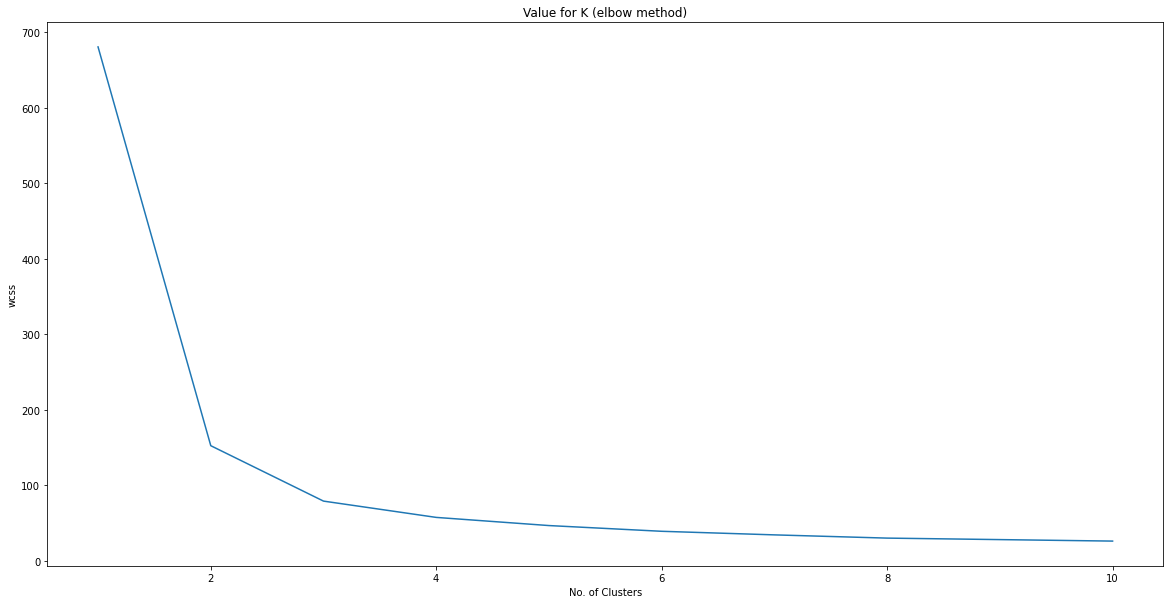

In [8]:

wcss=[]
for i in range(1,11):
    kmean=KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmean.fit(x)
    wcss.append(kmean.inertia_)
fig,ax=plt.subplots(figsize=(20,10))
ax.plot(range(1,11),wcss)
ax.set(title='Value for K (elbow method)',xlabel='No. of Clusters',ylabel='wcss');

Chossing the value 3 as the best fit for out model
We can have choose the K value directly by seeing the number of different labels present in the data

In [9]:
kmean=KMeans(n_clusters=3,init='k-means++',random_state=0)
y=kmean.fit_predict(x)

Plotting of data

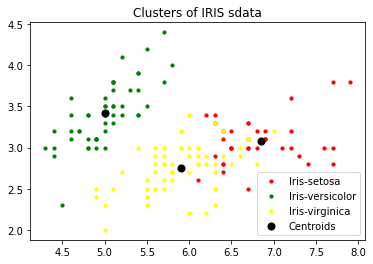

In [10]:
plt.scatter(x[y==0, 0], x[y == 0, 1], s = 10, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y==1,0],x[y==1,1],s = 10, c = 'green', label = 'Iris-versicolor')
plt.scatter(x[y==2,0],x[y==2,1],s = 10, c = 'yellow', label = 'Iris-virginica')
#plt.scatter(x[y==3,0],x[y==3,1],s = 10, c = 'pink', label = 'Cluster 4')
plt.scatter(kmean.cluster_centers_[:, 0], kmean.cluster_centers_[:, 1], s = 50, c = 'black', label = 'Centroids')
plt.title('Clusters of IRIS sdata')
plt.legend()
plt.show()
